## Basic Path Selection 
- Incorporating Path Selection based on Population and Distance


Top 5 Routes:
London: 8,982,000
Paris: 2,141,000
Moscow: 12,615,000
Dubai: 3,330,000
Tokyo: 13,960,000

Top 5 Total Population Visited: 
41,028,000

All Cities:
0 London
1 Paris
8 Moscow
7 Dubai
6 Tokyo
5 Sydney
9 Rio de Janeiro
2 New York
3 Los Angeles
4 San Francisco
0 London


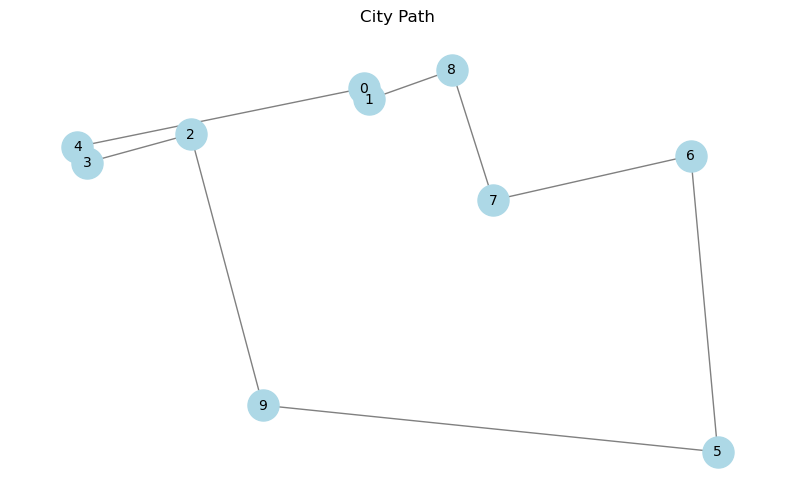

In [1]:
# Minimize distance travelled, circular pattern
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

# Example city data (name, latitude, longitude, population)
cities = [
    ("London", 51.5074, -0.1278, 8982000),
    ("Paris", 48.8566, 2.3522, 2141000),
    ("New York", 40.7128, -74.0060, 8399000),
    ("Los Angeles", 34.0522, -118.2437, 3990000),
    ("San Francisco", 37.7749, -122.4194, 883000),
    ("Sydney", -33.8651, 151.2099, 5312000),
    ("Tokyo", 35.6895, 139.6917, 13960000),
    ("Dubai", 25.2048, 55.2708, 3330000),
    ("Moscow", 55.7558, 37.6176, 12615000),
    ("Rio de Janeiro", -22.9068, -43.1729, 6748000)
]

# Calculate pairwise distances between cities
# currently using Euclidean distance but should change to haversine equation - not correct in current form
coordinates = np.array([(lat, lon) for _, lat, lon, _ in cities])
distances = cdist(np.radians(coordinates), np.radians(coordinates), metric='euclidean') * 6371  # Earth radius in km

# Set distances less than 20 miles to infinity
distances[distances < 20 / 0.621371] = np.inf

# Solve TSP using the nearest neighbor heuristic
num_cities = len(cities)
unvisited = set(range(1, num_cities))  # Exclude starting city
route = [0]  # Starting city is always the first
current_city = 0

while unvisited:
    next_city = min(unvisited, key=lambda city: distances[current_city, city])
    route.append(next_city)
    unvisited.remove(next_city)
    current_city = next_city

# Add starting city to complete the route
route.append(0)

# Output the route and total population visited
total_population = sum(cities[city][3] for city in route[0:5])
route_cities = [(cities[city][0],cities[city][3]) for city in route[0:5]]  # Get city names from the route indices

print("\nTop 5 Routes:")
for i in route_cities:
    print(f"{i[0]}: {i[1]:0,}")

print(f"\nTop 5 Total Population Visited: \n{total_population:0,}")

print("\nAll Cities:") 
for city in route:
    print(f"{city} {cities[city][0]}")

# Create network graph and add edges
G = nx.Graph()
for i in range(num_cities):
    G.add_node(i, label=cities[i][0])

for i in range(len(route) - 1):
    G.add_edge(route[i], route[i+1])

# Position nodes based on latitude and longitude
pos = {i: (lon, lat) for i, (_, lat, lon, _) in enumerate(cities)}

# Plot network diagram
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')
plt.title("City Path")
plt.axis('off')
plt.show()


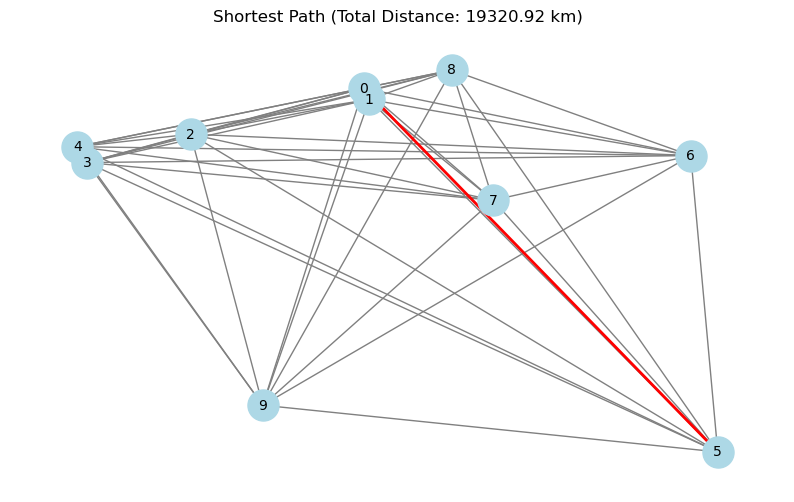

Shortest Path: ['London', 'Sydney']
Total Distance: 19320.918674625642


In [2]:
# Minimize distance - shortest path from start location to finish destination - considers all cities connected to all other cities
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

# Example city data (name, latitude, longitude, population)
cities = [
    ("London", 51.5074, -0.1278, 8982000),
    ("Paris", 48.8566, 2.3522, 2141000),
    ("New York", 40.7128, -74.0060, 8399000),
    ("Los Angeles", 34.0522, -118.2437, 3990000),
    ("San Francisco", 37.7749, -122.4194, 883000),
    ("Sydney", -33.8651, 151.2099, 5312000),
    ("Tokyo", 35.6895, 139.6917, 13960000),
    ("Dubai", 25.2048, 55.2708, 3330000),
    ("Moscow", 55.7558, 37.6176, 12615000),
    ("Rio de Janeiro", -22.9068, -43.1729, 6748000)
]

# Calculate pairwise distances between cities using Haversine formula
coordinates = np.array([(lat, lon) for _, lat, lon, _ in cities])
distances = cdist(np.radians(coordinates), np.radians(coordinates), metric='euclidean') * 6371  # Earth radius in km

# Create network graph and add edges with distances
G = nx.Graph()
for i in range(len(cities)):
    G.add_node(i, label=cities[i][0])

for i in range(len(cities)):
    for j in range(i + 1, len(cities)):
        distance = distances[i][j]
        if distance >= 20 / 0.621371:  # Add edge only if distance is greater than or equal to 20 miles
            G.add_edge(i, j, weight=distance)

# Calculate shortest path using Dijkstra's algorithm
start_node = 0  # Starting city index
end_node = 5    # Ending city index
shortest_path = nx.dijkstra_path(G, start_node, end_node, weight='weight')

# Extract city names from the shortest path
route_cities = [cities[node][0] for node in shortest_path]

# Calculate total distance of the shortest path
total_distance = sum(G.get_edge_data(shortest_path[i], shortest_path[i + 1])['weight'] for i in range(len(shortest_path) - 1))

# Plot network diagram
pos = {i: (lon, lat) for i, (_, lat, lon, _) in enumerate(cities)}
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)], edge_color='red', width=2)
plt.title("Shortest Path (Total Distance: {:.2f} km)".format(total_distance))
plt.axis('off')
plt.show()

print("Shortest Path:", route_cities)
print("Total Distance:", total_distance)


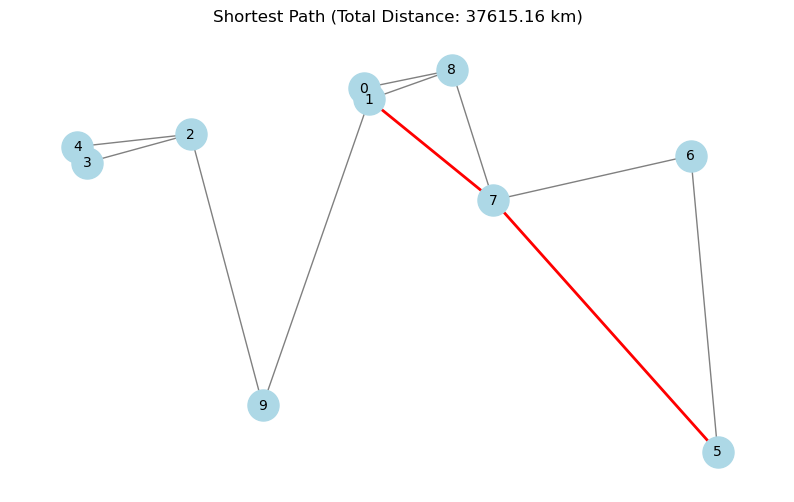

Shortest Path: ['London', 'Paris', 'Dubai', 'Sydney']
Total Distance: 37615.1557646719


In [3]:
# Minimizes distance - shortest path from start location to finish destination - considers that cities are only connnected to their 
# two closest neighbors (approximately)
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

# Example city data (name, latitude, longitude, population)
cities = [
    ("London", 51.5074, -0.1278, 8982000),
    ("Paris", 48.8566, 2.3522, 2141000),
    ("New York", 40.7128, -74.0060, 8399000),
    ("Los Angeles", 34.0522, -118.2437, 3990000),
    ("San Francisco", 37.7749, -122.4194, 883000),
    ("Sydney", -33.8651, 151.2099, 5312000),
    ("Tokyo", 35.6895, 139.6917, 13960000),
    ("Dubai", 25.2048, 55.2708, 3330000),
    ("Moscow", 55.7558, 37.6176, 12615000),
    ("Rio de Janeiro", -22.9068, -43.1729, 6748000)
]

# Calculate pairwise distances between cities using Haversine formula
coordinates = np.array([(lat, lon) for _, lat, lon, _ in cities])
distances = cdist(np.radians(coordinates), np.radians(coordinates), metric='euclidean') * 6371  # Earth radius in km

# Create network graph with cities as nodes
G = nx.Graph()
for i in range(len(cities)):
    G.add_node(i, label=cities[i][0])

# Connect each city to its two nearest neighbors
for i in range(len(cities)):
    sorted_indices = np.argsort(distances[i])
    neighbors = sorted_indices[1:3]  # Get the two nearest neighbors (excluding self)
    for neighbor in neighbors:
        G.add_edge(i, neighbor,weight=distance)

# Calculate shortest path using Dijkstra's algorithm
start_node = 0  # Starting city index
end_node = 5    # Ending city index
shortest_path = nx.dijkstra_path(G, start_node, end_node, weight='weight')

# Extract city names from the shortest path
route_cities = [cities[node][0] for node in shortest_path]

# Calculate total distance of the shortest path
total_distance = sum(G.get_edge_data(shortest_path[i], shortest_path[i + 1])['weight'] for i in range(len(shortest_path) - 1))

# Plot network diagram
pos = {i: (lon, lat) for i, (_, lat, lon, _) in enumerate(cities)}
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)], edge_color='red', width=2)
plt.title("Shortest Path (Total Distance: {:.2f} km)".format(total_distance))
plt.axis('off')
plt.show()

print("Shortest Path:", route_cities)
print("Total Distance:", total_distance)  

# Note: V29 is only possible due to the closest cities for N9 being N2 and N1
# This is an interesting outcome - conceptually makes sense but not intuitive


## Using Directed Graph
- using graph structure so I can control the connections easier
- using a seed(100) for draw_networkx so the diagrams can be reproduced

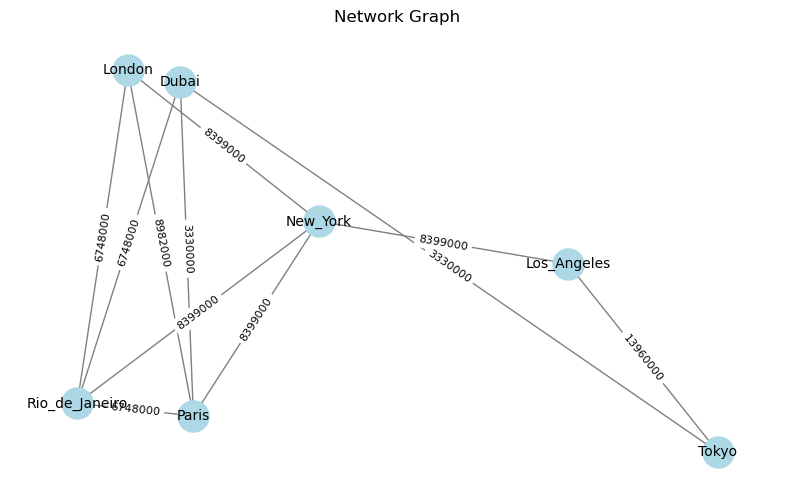

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    'London': {'Paris': {'population': 2141000, 'lat':48.8566, 'lon':2.3522}, 'New_York': {'population': 8399000, 'lat':40.7128, 'lon':-74.0060}, 'Rio_de_Janeiro': {'population': 6748000, 'lat':-22.9068, 'lon':-43.1729}},
    'Paris': {'Dubai': {'population': 3330000, 'lat':25.2048, 'lon':55.2708}, 'Rio_de_Janeiro': {'population': 6748000, 'lat':-22.9068, 'lon':-43.1729}, 'London':{'population':8982000, 'lat':51.5074, 'lon':-0.1278}, 'New_York': {'population': 8399000, 'lat':40.7128, 'lon':-74.0060}, 'Rio_de_Janeiro': {'population': 6748000, 'lat':-22.9068, 'lon':-43.1729} },
    'New_York': {'Los_Angeles': {'population': 3990000, 'lat':34.0522, 'lon':-118.2437}},
    'Dubai': {'Rio_de_Janeiro': {'population': 6748000, 'lat':-22.9068, 'lon':-43.1729}, 'Tokyo': {'population': 13960000, 'lat':35.6895, 'lon':139.6917}},
    'Rio_de_Janeiro': {'New_York': {'population': 8399000, 'lat':40.7128, 'lon':-74.0060}},
    'Tokyo': {'Dubai': {'population': 3330000, 'lat':25.2048, 'lon':55.2708},'Los_Angeles': {'population': 3990000, 'lat':34.0522, 'lon':-118.2437}},
    'Los_Angeles': {'New_York': {'population': 8399000, 'lat':40.7128, 'lon':-74.0060}, 'Tokyo': {'population': 13960000, 'lat':35.6895, 'lon':139.6917}}
}

# Create network graph
G = nx.Graph()

# Add nodes and edges
for source, destinations in graph.items():
    G.add_node(source)
    for destination, data in destinations.items():
        G.add_node(destination)
        G.add_edge(source, destination, weight=data['population'])

# Plot network graph
pos = nx.spring_layout(G, seed=100)
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Network Graph")
plt.axis('off')
plt.show()


Shortest Path: London-->Paris-->Dubai-->Tokyo
Total distance: 15,642,000 km


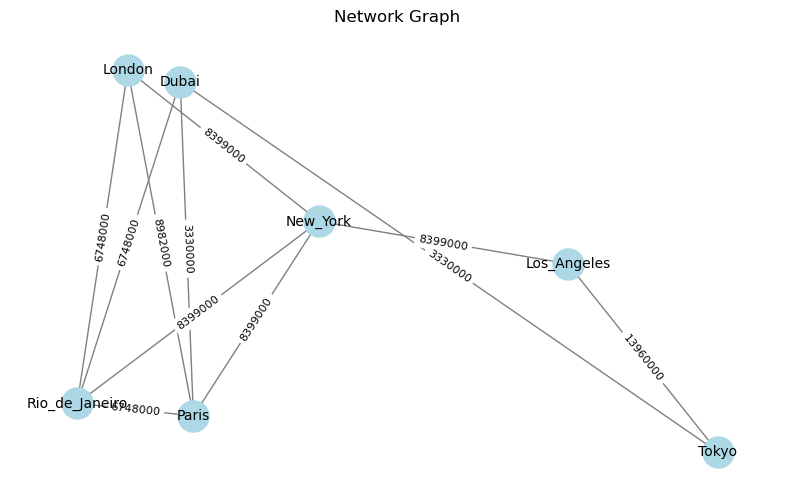

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Custom graph data
graph = {
    'London': {'Paris': {'population': 2141000, 'lat': 48.8566, 'lon': 2.3522}, 'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}, 'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}},
    'Paris': {'Dubai': {'population': 3330000, 'lat': 25.2048, 'lon': 55.2708}, 'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}, 'London': {'population': 8982000, 'lat': 51.5074, 'lon': -0.1278}, 'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}, 'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}},
    'New_York': {'Los_Angeles': {'population': 3990000, 'lat': 34.0522, 'lon': -118.2437}},
    'Dubai': {'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}, 'Tokyo': {'population': 13960000, 'lat': 35.6895, 'lon': 139.6917}},
    'Rio_de_Janeiro': {'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}},
    'Tokyo': {'Dubai': {'population': 3330000, 'lat': 25.2048, 'lon': 55.2708}, 'Los_Angeles': {'population': 3990000, 'lat': 34.0522, 'lon': -118.2437}},
    'Los_Angeles': {'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}, 'Tokyo': {'population': 13960000, 'lat': 35.6895, 'lon': 139.6917}}
}

# Create network graph
G = nx.Graph()

# Add nodes and edges
for source, destinations in graph.items():
    G.add_node(source)
    for destination, data in destinations.items():
        G.add_node(destination)
        G.add_edge(source, destination, weight=data['population'])

# Calculate shortest path using Dijkstra's algorithm
start_node = 'London'  # Starting city
end_node = 'Tokyo'
shortest_path = nx.dijkstra_path(G, start_node, end_node)

# Extract city names from the shortest path
route_cities = shortest_path

print(f'Shortest Path: {"-->".join(route_cities)}')
# Calculate total distance of the shortest path
total_distance = sum(G.get_edge_data(shortest_path[i], shortest_path[i + 1])['weight'] for i in range(len(shortest_path) - 1))
print(f'Total distance: {total_distance:0,} km')
# Plot network diagram
pos = nx.spring_layout(G, seed=100)
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Network Graph")
plt.axis('off')
plt.show()


Shortest Path: London-->Paris-->Dubai
Total distance: 12,312,000 km


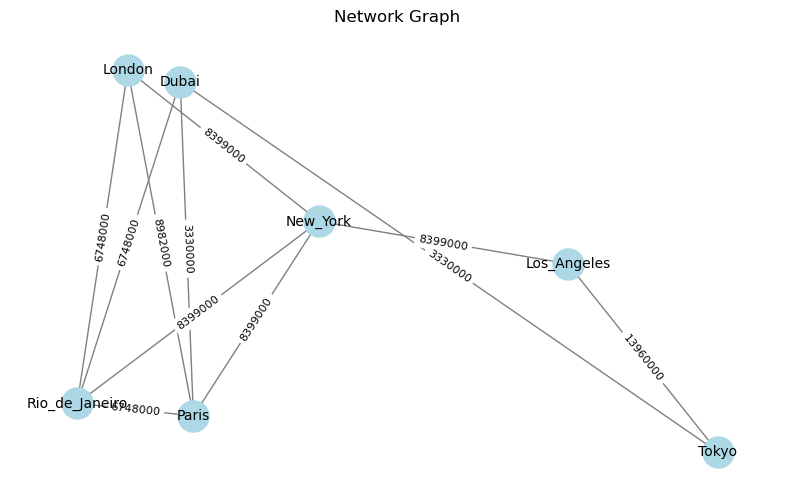

In [25]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Custom graph data
graph = {
    'London': {'Paris': {'population': 2141000, 'lat': 48.8566, 'lon': 2.3522}, 'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}, 'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}},
    'Paris': {'Dubai': {'population': 3330000, 'lat': 25.2048, 'lon': 55.2708}, 'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}, 'London': {'population': 8982000, 'lat': 51.5074, 'lon': -0.1278}, 'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}, 'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}},
    'New_York': {'Los_Angeles': {'population': 3990000, 'lat': 34.0522, 'lon': -118.2437}},
    'Dubai': {'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}, 'Tokyo': {'population': 13960000, 'lat': 35.6895, 'lon': 139.6917}},
    'Rio_de_Janeiro': {'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}},
    'Tokyo': {'Dubai': {'population': 3330000, 'lat': 25.2048, 'lon': 55.2708}, 'Los_Angeles': {'population': 3990000, 'lat': 34.0522, 'lon': -118.2437}},
    'Los_Angeles': {'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}, 'Tokyo': {'population': 13960000, 'lat': 35.6895, 'lon': 139.6917}}
}

# Create network graph
G = nx.Graph()

# Add nodes and edges
for source, destinations in graph.items():
    G.add_node(source)
    for destination, data in destinations.items():
        G.add_node(destination)
        G.add_edge(source, destination, weight=data['population'], distance=data['lon'])

# Calculate population per distance for each edge
for u, v, data in G.edges(data=True):
    distance = data['weight']
    population = data['weight']
    data['pop_per_distance'] = population / distance

# Find the path with the largest population per distance traveled
start_node = 'London'  # Starting city
end_node = 'Dubai'
largest_pop_per_distance_path = nx.dijkstra_path(G, start_node, end_node, weight='pop_per_distance')

# Extract city names from the largest population per distance path
route_cities = largest_pop_per_distance_path

print(f'Shortest Path: {"-->".join(route_cities)}')

# Calculate total distance and total population of the path
total_distance = sum(G.get_edge_data(largest_pop_per_distance_path[i], largest_pop_per_distance_path[i + 1])['weight'] for i in range(len(largest_pop_per_distance_path) - 1))
print(f'Total distance: {total_distance:0,} km')
# Plot network diagram
pos = nx.spring_layout(G, seed=100)
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Network Graph")
plt.axis('off')
plt.show()

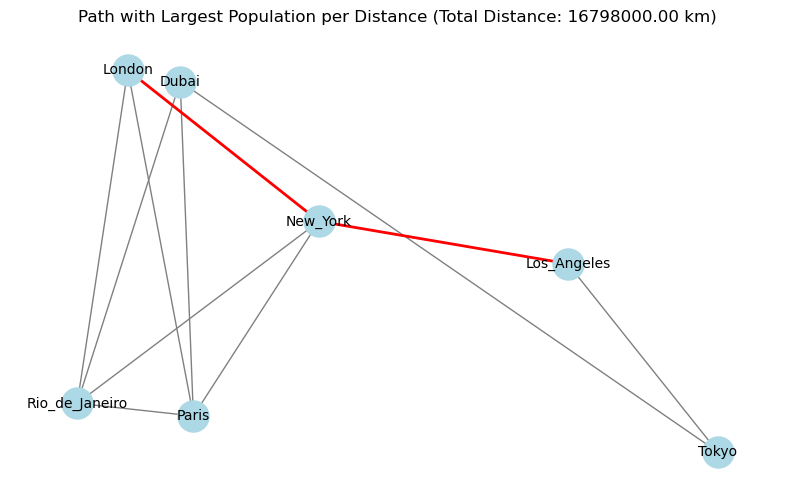

Path with Largest Population per Distance: ['London', 'New_York', 'Los_Angeles']
Total Distance: 16798000


In [8]:
# not working correctly when using min_city parameter
# options created by all_shortest_paths sometimes does not have options for larger min_num_cities

import networkx as nx
import matplotlib.pyplot as plt

# Custom graph data
graph = {
    'London': {'Paris': {'population': 2141000, 'lat': 48.8566, 'lon': 2.3522}, 'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}, 'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}},
    'Paris': {'Dubai': {'population': 3330000, 'lat': 25.2048, 'lon': 55.2708}, 'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}, 'London': {'population': 8982000, 'lat': 51.5074, 'lon': -0.1278}, 'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}, 'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}},
    'New_York': {'Los_Angeles': {'population': 3990000, 'lat': 34.0522, 'lon': -118.2437}},
    'Dubai': {'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}, 'Tokyo': {'population': 13960000, 'lat': 35.6895, 'lon': 139.6917}},
    'Rio_de_Janeiro': {'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}},
    'Tokyo': {'Dubai': {'population': 3330000, 'lat': 25.2048, 'lon': 55.2708}, 'Los_Angeles': {'population': 3990000, 'lat': 34.0522, 'lon': -118.2437}},
    'Los_Angeles': {'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}, 'Tokyo': {'population': 13960000, 'lat': 35.6895, 'lon': 139.6917}}
}

# Create network graph
G = nx.Graph()

# Add nodes and edges
for source, destinations in graph.items():
    G.add_node(source)
    for destination, data in destinations.items():
        G.add_node(destination)
        G.add_edge(source, destination, weight=data['population'])

# Calculate population per distance for each edge
for u, v, data in G.edges(data=True):
    distance = data['weight']
    population = data['weight']
    data['pop_per_distance'] = population / (distance)**0.5

# Set the minimum number of cities in the path
min_num_cities = 1
start_city = 'London'
end_city = 'Los_Angeles'

# Find the path with the largest population per distance traveled while ensuring minimum cities
shortest_paths = nx.all_shortest_paths(G, start_city, end_city, weight='pop_per_distance')
path_with_min_cities = None

for path in shortest_paths:
    if len(path) >= min_num_cities:
        if path_with_min_cities is None or sum(G.get_edge_data(path[i], path[i + 1])['weight'] for i in range(len(path) - 1)) > sum(G.get_edge_data(path_with_min_cities[i], path_with_min_cities[i + 1])['weight'] for i in range(len(path_with_min_cities) - 1)):
            path_with_min_cities = path


# Extract city names from the path
route_cities = [city for city in path_with_min_cities]

# Calculate total distance of the path
total_distance = sum(G.get_edge_data(path_with_min_cities[i], path_with_min_cities[i + 1])['weight'] for i in range(len(path_with_min_cities) - 1))

# Plot network diagram
pos = nx.spring_layout(G, seed=100)
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=[(path_with_min_cities[i], path_with_min_cities[i + 1]) for i in range(len(path_with_min_cities) - 1)], edge_color='red', width=2)
plt.title("Path with Largest Population per Distance (Total Distance: {:.2f} km)".format(total_distance))
plt.axis('off')
plt.show()

print("Path with Largest Population per Distance:", route_cities)
print("Total Distance:", total_distance)


